<a href="https://colab.research.google.com/github/moghanapriya-27/Datascience/blob/main/exp1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   

   zero.17  zero.18  2urvived  
0        0        0         0  
1        0        0         1  
2        0        0         1  

[3 rows x 28 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null 

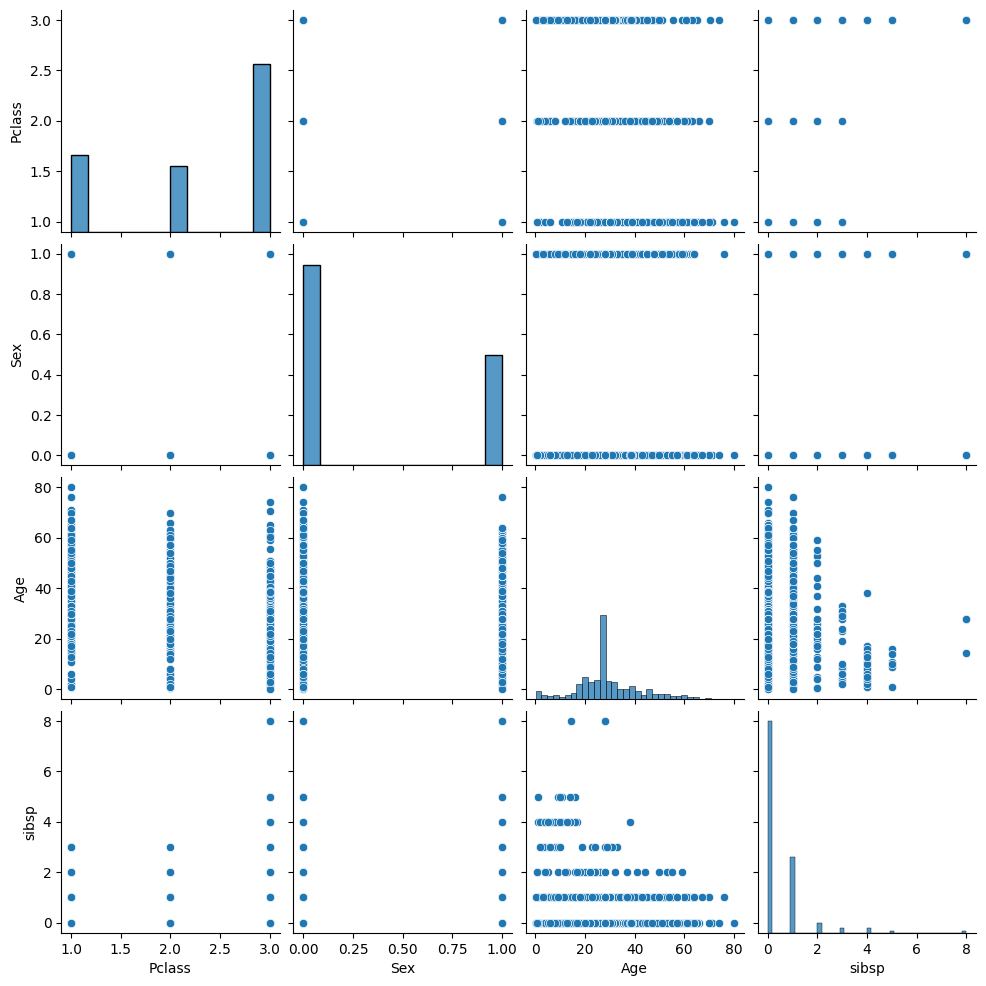

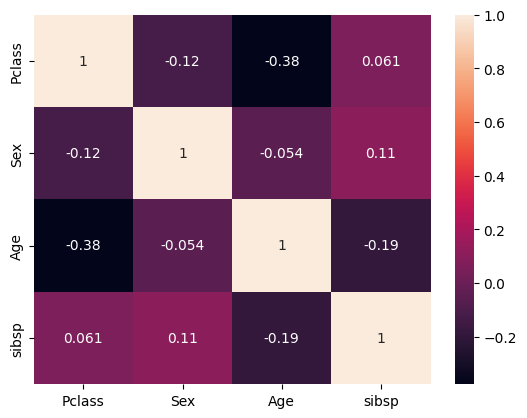

In [ ]:
#exp 1
import numpy as np
import pandas as pd
data=pd.read_csv("/content/titanic.csv")
print(data.head(3))
d_f=pd.DataFrame(data)
d_f.info()
d_f.isnull().sum()
print(d_f["sibsp"].ffill())
print(d_f["sibsp"].bfill())
d_f["Sex"]=d_f["Sex"].map({0:"fem",1:"mal"})
print(d_f["Sex"].head(5))
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d_f["Sex"]=le.fit_transform(d_f["Sex"])
print(d_f["Sex"].head())
from sklearn.preprocessing import StandardScaler
po+++++++++++++++++++++++++++++++++sc=StandardScaler()
d_f["Fare"]=sc.fit_transform(d_f[["Fare"]])
print(d_f["Fare"].head(5))
import matplotlib.pyplot as plt
import seaborn as sns
s_f=["Pclass","Sex","Age","sibsp"]
sns.pairplot(d_f[s_f])
plt.show()
#correlation heatmap
c=["Pclass","Sex","Age","sibsp"]
c_r=d_f[c].corr()
sns.heatmap(c_r,annot=True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


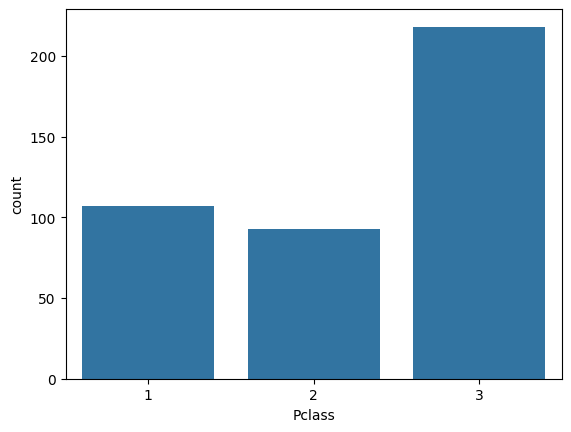

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/tested.csv')
df.shape
df.info()
df.describe()
imp = SimpleImputer(strategy='mean')
df['Age'] = imp.fit_transform(df[['Age']])
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
sns.countplot(x='Pclass', data=df)
female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]['Name']
third_class_kids = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
first_class_old = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
first_class_old_survived = df[(df['Pclass'] == 1) & (df['Age'] > 40) & (df['Survived'] == 1)]
males_fare_above_100 = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
embarked_C_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
sibsp_above_2 = df[df['SibSp'] > 2]
no_family_died = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
top5_oldest_survived = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
fare_zero = df[df['Fare'] == 0]


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
df.shape


(418, 12)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        418 non-null    object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
imp = SimpleImputer(strategy='mean')
df['Age'] = imp.fit_transform(df[['Age']])
print(df["Age"].isnull().head(3))


0    False
1    False
2    False
Name: Age, dtype: bool


0      Unknown
1      Unknown
2      Unknown
3      Unknown
4      Unknown
        ...   
413    Unknown
414       C105
415    Unknown
416    Unknown
417    Unknown
Name: Cabin, Length: 418, dtype: object
0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object


<Axes: xlabel='Pclass', ylabel='count'>

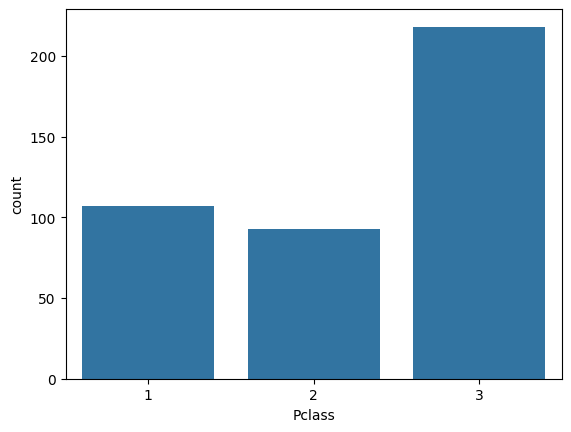

In [ ]:
df['Cabin'] = df['Cabin'].fillna('Unknown')
print(df["Cabin"])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df["Embarked"])
sns.countplot(x='Pclass', data=df)


In [ ]:
female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]['Name']
female_survivors.head()


,Name
1,"Wilkes, Mrs. James (Ellen Needs)"
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
6,"Connolly, Miss. Kate"
8,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)"
12,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)"


In [ ]:
third_class_kids = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
third_class_kids.shape
first_class_old = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
first_class_old.shape


(53, 12)

In [ ]:
first_class_old = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
first_class_old.shape


(53, 12)

In [3]:
MOGHANAPRIYA R,
231801102,Ai&Ds-3rd year